# MKA-MLF, Lab_08 - RNN

Recurrent Neural Networks, are a class of artificial neural networks designed to recognize patterns in sequences of data, such as text, genomes, handwriting, or spoken words. Unlike traditional neural networks, which assume all inputs (and outputs) are independent of each other, RNNs are designed to recognize sequential or temporal patterns, making them especially suited for tasks like language modeling, speech recognition, and time series prediction.

## Exercise 1 - Time Series Forecasting

### 1.0 Import Libraries

In [171]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, SimpleRNN
from tensorflow.keras.optimizers import Adam

### 1.1 Generating dataset

In [172]:
def generate_time_series(batch_size, n_steps):
  freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
  time = np.linspace(0,1,n_steps)

  series = 0.5 * np.sin((time - offsets1) * (freq1*10 + 10))
  series += 0.2 * np.sin((time - offsets2) * (freq2*20 + 20))
  series += 0.1 * (np.random.rand(batch_size, n_steps)- 0.5)
  return series[..., np.newaxis].astype(np.float32)

In [173]:
data_size = 10000
n_steps = 50
np.random.seed(0)

series = generate_time_series(data_size, n_steps + 1)

### 1.2 Train/Valid/Test split

In [174]:
X_train, y_train = series[:7000, :n_steps], series[:7000, -1] #last one as target/layer -1 index #7000 for training
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1] #2000 data samples for validation
X_test, y_test = series[9000:, :n_steps], series[9000:, -1] #1000 data samples for testing

In [175]:
no_training_epochs = 5

### 1.3 Data examination

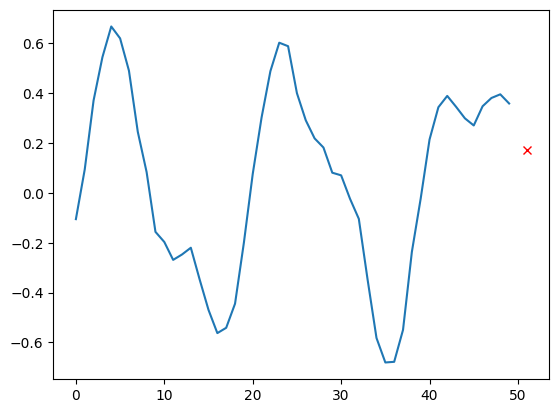

In [176]:
plt.figure()
plt.plot(X_train[0])
plt.plot(n_steps+1, y_train[0], 'rx')

### 1.4 Simple Linear model

In [177]:
# Model definition
model_linear = Sequential()
model_linear.add(Flatten(input_shape=(50,1)))
model_linear.add(Dense(1, activation = None))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [178]:
# Model building

learning_rate = 0.001
optimizer = Adam(learning_rate)
model_linear.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['mean_squared_error'])

In [179]:
model_linear.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

In [180]:
# Model training

history_linear = model_linear.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.3470 - mean_squared_error: 0.3470 - val_loss: 0.0579 - val_mean_squared_error: 0.0579
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0505 - mean_squared_error: 0.0505 - val_loss: 0.0329 - val_mean_squared_error: 0.0329
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - loss: 0.0309 - mean_squared_error: 0.0309 - val_loss: 0.0239 - val_mean_squared_error: 0.0239
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 33ms/step - loss: 0.0225 - mean_squared_error: 0.0225 - val_loss: 0.0188 - val_mean_squared_error: 0.0188
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - loss: 0.0187 - mean_squared_error: 0.0187 - val_loss: 0.0159 - val_mean_squared_error: 0.0159


In [181]:
def plot_function(history):
  plt.figure()

  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='validation_loss')
  plt.legend()
  plt.grid()
  plt.xlim([0,no_training_epochs-1])
  plt.xlabel('epochs')

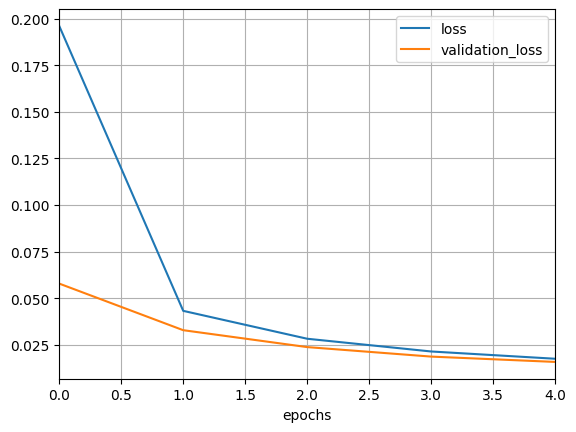

In [182]:
plot_function(history_linear)

In [183]:
score = model_linear.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

Test loss: 0.015564663335680962
Test MSE:  0.015564663335680962


### 1.5 Simple RNN Model

In [184]:
model_simple_rnn = Sequential()
model_simple_rnn.add(SimpleRNN(1, input_shape=[50, 1]))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [185]:
learning_rate_simple_rnn = 0.001
optimizer_simple_rnn = Adam(learning_rate_simple_rnn)
model_simple_rnn.compile(loss='mean_squared_error', optimizer=optimizer_simple_rnn, metrics=['mean_squared_error'])

In [186]:
history_simple_rnn = model_simple_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 68s 309ms/step - loss: 0.1345 - mean_squared_error: 0.1345 - val_loss: 0.1100 - val_mean_squared_error: 0.1100
Epoch 2/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 54s 247ms/step - loss: 0.1044 - mean_squared_error: 0.1044 - val_loss: 0.0794 - val_mean_squared_error: 0.0794
Epoch 3/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 84s 256ms/step - loss: 0.0729 - mean_squared_error: 0.0729 - val_loss: 0.0484 - val_mean_squared_error: 0.0484
Epoch 4/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 56s 258ms/step - loss: 0.0428 - mean_squared_error: 0.0428 - val_loss: 0.0271 - val_mean_squared_error: 0.0271
Epoch 5/5
219/219 ━━━━━━━━━━━━━━━━━━━━ 55s 250ms/step - loss: 0.0257 - mean_squared_error: 0.0257 - val_loss: 0.0208 - val_mean_squared_error: 0.0208


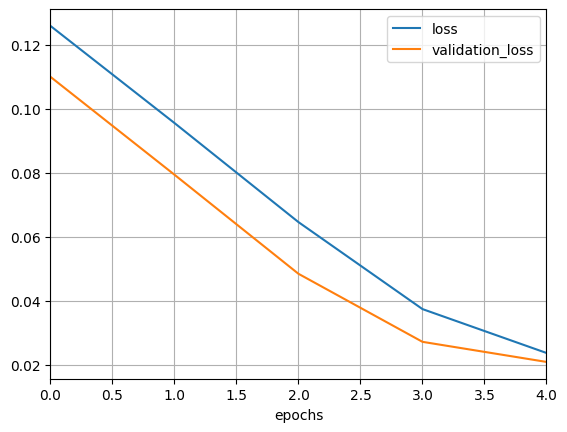

In [187]:
plot_function(history_simple_rnn)

### 1.5 Deep RNN Model

In [188]:
model_deep_rnn = Sequential()
model_deep_rnn.add(SimpleRNN(20, return_sequences = True, input_shape=[50, 1]))
model_deep_rnn.add(SimpleRNN(20, return_sequences = True)) #has an memory
model_deep_rnn.add(SimpleRNN(1, input_shape=[50, 1])) #output

In [189]:
learning_rate_deep_rnn = 0.001
optimizer_deep_rnn = Adam(learning_rate_deep_rnn)
model_deep_rnn.compile(loss='mean_squared_error', optimizer=optimizer_deep_rnn, metrics=['mean_squared_error'])

In [190]:
history_deep_rnn = model_deep_rnn.fit(X_train, y_train, epochs=no_training_epochs, validation_data=[X_valid, y_valid])

Epoch 1/5
171/219 ━━━━━━━━━━━━━━━━━━━━ 29s 614ms/step - loss: 0.0560 - mean_squared_error: 0.0560

KeyboardInterrupt: 

In [ ]:
score = model_deep_rnn.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print(f'Test MSE: ', score[1])

In [ ]:
plot_function(history_deep_rnn)

## Exercise 2 - The movie review




Based on the written rewiev, classify if the movie if good or bad

### 2.0 - Import libraries

In [191]:
from tensorflow.keras.preprocessing.text import Tokenizer
import keras
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense, Embedding, SimpleRNN, GRU
from keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt
from keras.optimizers import Adam

### 2.1 - Load dataset

In [192]:
(X_train, y_train), (X_test, y_test) = keras.datasets.imdb.load_data()

ERROR:tensorflow:==================================
Object was never used (type <class 'tensorflow.python.ops.tensor_array_ops.TensorArray'>):
If you want to mark it as used call its "mark_used()" method.
It was originally created here:
  File "/usr/local/lib/python3.11/dist-packages/keras/src/backend/tensorflow/rnn.py", line 418, in <genexpr>
    output_ta_t = tuple(  File "/usr/local/lib/python3.11/dist-packages/tensorflow/python/util/tf_should_use.py", line 288, in wrapped
    return _add_should_use_warning(fn(*args, **kwargs),


### 2.2 - Dataset examination

In [193]:
word_index = keras.datasets.imdb.get_word_index()
id_to_word = {id_ + 3:word for word, id_ in word_index.items()}
for id_, token in enumerate(("<pad>", "<sos>", "<unk>")):
  id_to_word[id_] = token

In [194]:
single_sequence = " ".join([id_to_word[id_] for id_ in X_train[0][:]])

In [195]:
single_sequence

"<sos> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert redford's is an amazing actor and now the same being director norman's father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for retail and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also congratulations to the two little boy's that played the part's of norman and paul they were just brilliant children are often left out of the praising list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and shou

In [196]:
max_length = 150  # Define the maximum length of a review
X_train = keras.preprocessing.sequence.pad_sequences(X_train, maxlen=max_length, padding='post', truncating='post', value=0)
X_test = keras.preprocessing.sequence.pad_sequences(X_test, maxlen=max_length, padding='post', truncating='post', value=0)

In [203]:
embed_size = 128
vocabulary_size = 1000

model_RNN = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.SimpleRNN(128, return_sequences=True),
    keras.layers.SimpleRNN(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_RNN.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history_RNN = model_RNN.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


  4/625 ━━━━━━━━━━━━━━━━━━━━ 13:25 1s/step - accuracy: 0.4089 - loss: 0.7813

KeyboardInterrupt: 

TASK: Modify structure, change the core of the network from RNN to LSTM and GRU. Compare the results

In [199]:
#LSTM code
model_LSTM = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.LSTM(128, return_sequences=True),
    keras.layers.LSTM(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_LSTM.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_LSTM = model_LSTM.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 76s 121ms/step - accuracy: 0.5383 - loss: 0.6845 - val_accuracy: 0.6920 - val_loss: 0.5778
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 127ms/step - accuracy: 0.7151 - loss: 0.5655 - val_accuracy: 0.7782 - val_loss: 0.5055
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 120ms/step - accuracy: 0.7916 - loss: 0.4601 - val_accuracy: 0.8118 - val_loss: 0.4254
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 86s 138ms/step - accuracy: 0.8312 - loss: 0.3855 - val_accuracy: 0.8142 - val_loss: 0.4028
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 127ms/step - accuracy: 0.8452 - loss: 0.3591 - val_accuracy: 0.8220 - val_loss: 0.3906


In [200]:
#GRU code
model_GRU = keras.models.Sequential([
    keras.layers.Embedding(vocabulary_size, embed_size,
                           input_shape=[None]),
    keras.layers.GRU(128, return_sequences=True),
    keras.layers.GRU(128),
    keras.layers.Dense(1, activation='sigmoid')
    ])

optimizer = Adam(learning_rate = 0.001)
model_GRU.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])

history_GRU = model_GRU.fit(X_train, y_train, epochs=5, validation_split=0.2)

Epoch 1/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 78s 125ms/step - accuracy: 0.5299 - loss: 0.6894 - val_accuracy: 0.7298 - val_loss: 0.5601
Epoch 2/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.7787 - loss: 0.4752 - val_accuracy: 0.8290 - val_loss: 0.3796
Epoch 3/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.8423 - loss: 0.3598 - val_accuracy: 0.8376 - val_loss: 0.3714
Epoch 4/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 73s 117ms/step - accuracy: 0.8544 - loss: 0.3274 - val_accuracy: 0.8334 - val_loss: 0.3749
Epoch 5/5
625/625 ━━━━━━━━━━━━━━━━━━━━ 77s 124ms/step - accuracy: 0.8751 - loss: 0.2932 - val_accuracy: 0.8294 - val_loss: 0.3821


In [205]:
#comparison
score_RNN = model_RNN.evaluate(X_test, y_test, verbose=0)
print('RNN')
print('Test loss:', score_RNN[0])
print(f'Test accuracy: ', score_RNN[1]*100, "%")

score_LSTM = model_LSTM.evaluate(X_test, y_test, verbose=0)
print('LSTM')
print('Test loss:', score_LSTM[0])
print(f'Test accuracy: ', score_LSTM[1]*100, "%")

score_GRU = model_GRU.evaluate(X_test, y_test, verbose=0)
print('GRU')
print('Test loss:', score_GRU[0])
print(f'Test accuracy: ', score_GRU[1]*100, "%")

LSTM


KeyboardInterrupt: 